<a href="https://colab.research.google.com/github/archie-sinha/Reinforcement-Learning/blob/main/Advertisement_Recommendation_Systems_using_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL PROJECT



##**Archisha Sinha**

***Our Modus Operandi***

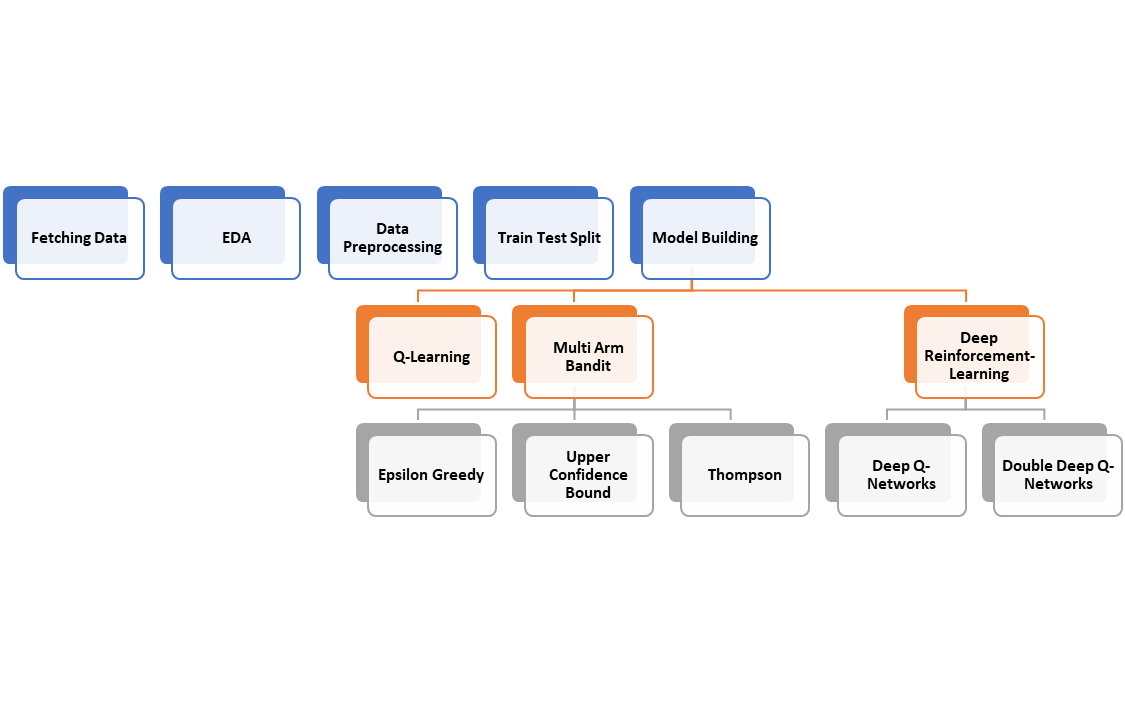

## Creating own dataset

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker

In [ ]:
# Initialize Faker
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
num_data_points = 50000

initializes the Faker instance, sets a random seed for reproducibility (so results remain consistent across runs), and defines the number of data points (50000) to generate.

In [ ]:
# Generate random user information
user_ids = [f'U{str(i).zfill(4)}' for i in np.random.choice(range(1, 1001), num_data_points)]
ages = np.random.randint(18, 65, num_data_points)
genders = np.random.choice(['Male', 'Female', 'Other'], num_data_points)

# Generate ad information
ad_ids = [f'A{str(i).zfill(3)}' for i in np.random.choice(range(1, 101), num_data_points)]
ad_categories = np.random.choice(['Fashion', 'Technology', 'Travel', 'Food', 'Health'], num_data_points)
ad_types = np.random.choice(['Banner', 'Video', 'Carousel'], num_data_points)
ad_content_features = np.random.choice(['Humorous', 'Informative', 'Persuasive', 'Inspirational'], num_data_points)

# Generate contextual information
timestamps = [fake.date_time_this_year() for _ in range(num_data_points)]
device_types = np.random.choice(['Mobile', 'Desktop', 'Tablet'], num_data_points)
platforms = np.random.choice(['Website', 'App', 'Email'], num_data_points)
locations = np.random.choice(['Home', 'Work', 'Transit', 'Cafe', 'Other'], num_data_points)
session_ids = [f'S{str(i).zfill(5)}' for i in range(1, num_data_points + 1)]

# Generate interaction data
clicks = np.random.choice([0, 1], num_data_points, p=[0.7, 0.3])  # 30% click-through rate
engagement_durations = [np.random.randint(0, 300) if click == 1 else 0 for click in clicks]  # In seconds
conversions = np.random.choice([0, 1], num_data_points, p=[0.9, 0.1])  # 10% conversion rate

# Calculate reward based on interaction data
rewards = [1 + (5 if conversion else 0) if click else 0 for click, conversion in zip(clicks, conversions)]

* User Information: user_ids, ages, genders - creating a dataset of user attributes.
* Ad Information: ad_ids, ad_categories, ad_types, ad_content_features - specifying ad attributes and their characteristics.
* Contextual Information: timestamps, device_types, platforms, locations, session_ids - adding context to user sessions.
* Interaction Data: clicks, engagement_durations, conversions - generating user engagement metrics.
* Rewards: rewards - creating reward values based on interactions and conversions. The reward is 1 for a click and additional 5 if there's a conversion.

In [ ]:
# Create the DataFrame
df = pd.DataFrame({
    'User_ID': user_ids,
    'Age': ages,
    'Gender': genders,
    'Ad_ID': ad_ids,
    'Ad_Category': ad_categories,
    'Ad_Type': ad_types,
    'Ad_Content_Features': ad_content_features,
    'Timestamp': timestamps,
    'Device_Type': device_types,
    'Platform': platforms,
    'Location': locations,
    'Session_ID': session_ids,
    'Click': clicks,
    'Engagement_Duration': engagement_durations,
    'Conversion': conversions,
    'Reward': rewards
})

In [ ]:
# Display the first few rows of the generated dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv('ad_recommendation_data.csv', index=False)

  User_ID  Age  Gender Ad_ID Ad_Category Ad_Type Ad_Content_Features  \
0   U0103   18  Female  A004      Health  Banner            Humorous   
1   U0436   48   Other  A040      Health  Banner         Informative   
2   U0861   44  Female  A051  Technology   Video       Inspirational   
3   U0271   61    Male  A081      Health   Video       Inspirational   
4   U0107   53   Other  A055  Technology   Video            Humorous   

                   Timestamp Device_Type Platform Location Session_ID  Click  \
0 2024-04-27 13:07:35.170166      Mobile  Website     Cafe     S00001      1   
1 2024-06-23 19:12:25.100462      Tablet      App     Home     S00002      0   
2 2024-05-28 19:25:54.014225      Tablet    Email  Transit     S00003      0   
3 2024-04-20 23:19:02.202099      Mobile    Email     Work     S00004      1   
4 2024-02-01 09:50:16.425413      Mobile    Email     Home     S00005      0   

   Engagement_Duration  Conversion  Reward  
0                   90           0       

# IMPLEMENTATION 1

## About the Dataset
- The dataset includes columns like User_ID, Age, Gender, Ad_ID, Ad_Category, Ad_Type, Ad_Content_Features, Timestamp, Device_Type, Platform, Location, Clicks, Engagement Duration, Conversion, and Reward.

* User Information: user_ids, ages, genders - creating a dataset of user attributes.
* Ad Information: ad_ids, ad_categories, ad_types, ad_content_features - specifying ad attributes and their characteristics.
* Contextual Information: timestamps, device_types, platforms, locations, session_ids - adding context to user sessions.
* Interaction Data: clicks, engagement_durations, conversions - generating user engagement metrics.
* Rewards: rewards - creating reward values based on interactions and conversions. The reward is 1 for a click and additional 5 if there's a conversion.

## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

the Faker library, which is used to generate random, realistic data (such as names, addresses, dates). This setup step ensures that the library is available for later cells.

In [ ]:
data = pd.read_csv('/content/ad_recommendation_data (1).csv')

In [ ]:
# Preprocess data
# Encode categorical features as numerical
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Device_Type'] = data['Device_Type'].astype('category').cat.codes
data['Platform'] = data['Platform'].astype('category').cat.codes
data['Location'] = data['Location'].astype('category').cat.codes
data['Ad_Category'] = data['Ad_Category'].astype('category').cat.codes
data['Ad_Type'] = data['Ad_Type'].astype('category').cat.codes
data['Ad_Content_Features'] = data['Ad_Content_Features'].astype('category').cat.codes

* Converts the column to a category data type. This step is necessary to treat the column as categorical, which is a type that can be assigned numeric codes.
* Encodes each category within the column as a unique integer code using .cat.codes. This encoding is useful for machine learning models, which often require numerical input rather than text.

# IMPLEMENTATION 1

In [ ]:
# Define actions (Ad IDs) and states (user + contextual features)
actions = data['Ad_ID'].unique()
num_actions = len(actions)
states = data[['Age', 'Gender', 'Device_Type', 'Platform', 'Location']].drop_duplicates().apply(tuple, axis=1).tolist()
num_states = len(states)

In [ ]:
# Mapping states and actions to indices
state_to_index = {state: idx for idx, state in enumerate(states)}
action_to_index = {action: idx for idx, action in enumerate(actions)}

* A dictionary state_to_index where each state (represented as a tuple of features) is mapped to a unique integer index is created.
* Enumerate(states) generates pairs of indices and states, allowing each unique state to be assigned a sequential index.
*  A dictionary action_to_index where each unique action (an Ad_ID) is mapped to a unique integer index is created

In [ ]:
# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

* A Q-table (a 2D array) is initialized with zeros. The table has dimensions defined by the number of unique states (num_states) and the number of unique actions (num_actions).
* Each entry q_table[state, action] will store the Q-value, which represents the expected cumulative reward for taking a specific action in a specific state.
* Initializing with zeros assumes no prior knowledge, and Q-values will be updated as the agent learns through interaction with the environment.

In [ ]:
print(q_table)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Q-learning parameters

# 'alpha' is the learning rate, controlling how much newly acquired information overrides old information
# A lower value makes learning slower but may help with stability
alpha = 0.1

# 'gamma' is the discount factor, determining the importance of future rewards
# A value close to 1 focuses more on long-term rewards, while a value close to 0 focuses on immediate rewards
gamma = 0.9

# 'epsilon' is the exploration rate, specifying the probability of choosing a random action instead of the best-known action
# This helps in exploring the environment and finding optimal actions
epsilon = 0.1

# 'num_episodes' is the total number of episodes (iterations) over which the agent will learn
# Higher values provide more learning opportunities and may lead to better results
num_episodes = 500


In [ ]:
# Function to choose an action using epsilon-greedy policy
def choose_action(state_index):
    # Check if a random number between 0 and 1 is less than epsilon
    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action by selecting a random index between 0 and num_actions - 1
        action_index = random.randint(0, num_actions - 1)
    else:
        # Exploit: choose the action with the highest Q-value for the current state
        # np.argmax(q_table[state_index]) returns the index of the action with the max Q-value in this state
        action_index = np.argmax(q_table[state_index])

    # Return the selected action index
    return action_index


In [ ]:
# Training the Q-learning agent
for episode in range(num_episodes):
    # Randomly select a row from the dataset to simulate an ad recommendation scenario
    row = data.sample(1).iloc[0]

    # Get the state as a tuple of selected features and find its corresponding index in the Q-table
    state = (row['Age'], row['Gender'], row['Device_Type'], row['Platform'], row['Location'])
    state_index = state_to_index[state]

    # Choose an action using the epsilon-greedy policy based on the current state
    action_index = choose_action(state_index)

    # Observe the reward for the action taken: positive if there was a click, negative otherwise
    reward = row['Reward'] if row['Click'] == 1 else -1

    # Update Q-value for the current state-action pair using the Q-learning formula
    old_q_value = q_table[state_index, action_index]
    next_max = np.max(q_table[state_index])  # Max Q-value for the next state
    new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
    q_table[state_index, action_index] = new_q_value

    # Print episode details every 100 episodes for monitoring progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}")
        print("Sample State:", state)
        print("Chosen Action:", actions[action_index])
        print("Old Q-value:", old_q_value)
        print("New Q-value:", new_q_value)
        print("Reward received:", reward)
        print("Updated Q-table entry:", q_table[state_index, action_index])
        print("-" * 50)


Episode 100
Sample State: (38, 0, 0, 0, 1)
Chosen Action: A005
Old Q-value: 0.0
New Q-value: 0.1
Reward received: 1
Updated Q-table entry: 0.1
--------------------------------------------------
Episode 200
Sample State: (54, 0, 2, 0, 2)
Chosen Action: A004
Old Q-value: 0.0
New Q-value: -0.1
Reward received: -1
Updated Q-table entry: -0.1
--------------------------------------------------
Episode 300
Sample State: (37, 1, 2, 0, 2)
Chosen Action: A004
Old Q-value: 0.1
New Q-value: -0.0010000000000000009
Reward received: -1
Updated Q-table entry: -0.0010000000000000009
--------------------------------------------------
Episode 400
Sample State: (42, 1, 1, 2, 1)
Chosen Action: A004
Old Q-value: 0.0
New Q-value: -0.1
Reward received: -1
Updated Q-table entry: -0.1
--------------------------------------------------
Episode 500
Sample State: (36, 2, 0, 1, 0)
Chosen Action: A004
Old Q-value: 0.0
New Q-value: -0.1
Reward received: -1
Updated Q-table entry: -0.1
---------------------------------

In [ ]:
# Function to recommend an ad based on the trained Q-table
def recommend_ad(age, gender, device_type, platform, location):
    # Create the state tuple that combines input parameters into a single state representation
    state = (age, gender, device_type, platform, location)

    # Check if the state exists in our state index mapping
    if state not in state_to_index:
        print("State not found in the Q-table.")
        return None  # Exit if the state is not recognized

    # Get the state index corresponding to the current state
    state_index = state_to_index[state]

    # Find the index of the action (ad) with the highest Q-value for this state
    best_action_index = np.argmax(q_table[state_index])

    # Retrieve the recommended ad based on the best action index
    recommended_ad = actions[best_action_index]

    # Print the recommended ad details for user feedback
    print("Recommended Ad ID:", recommended_ad)
    print("Q-value for this recommendation:", q_table[state_index, best_action_index])

    # Return the recommended ad ID
    return recommended_ad



* The recommend_ad function is designed to suggest an ad based on user attributes (age, gender, device type, platform, and location). It creates a state tuple from these inputs, checks if the state exists in a predefined mapping (state_to_index), and retrieves the corresponding index if valid.
*  Using this index, it employs np.argmax() to identify the ad with the highest Q-value, indicating the best expected performance. The recommended ad is then obtained from the actions list, and its ID and Q-value are printed for transparency. Finally, the function returns the recommended ad ID for further use.

Example

In [ ]:
# Input user profile and context (replace with actual values as needed)
sample_age = 25
sample_gender = 0  # Assuming 0 represents one gender category
sample_device_type = 1  # Example encoded value for device type
sample_platform = 2  # Example encoded value for platform
sample_location = 3  # Example encoded value for location

In [ ]:
# Recommend an ad based on the user's profile and context
recommended_ad = recommend_ad(sample_age, sample_gender, sample_device_type, sample_platform, sample_location)

Recommended Ad ID: A004
Q-value for this recommendation: 0.0


* The recommend_ad function is called, providing user-specific parameters (age, gender, device type, platform, and location) to determine the most suitable ad for that user.
* The recommended ad's ID is stored in the variable recommended_ad, enabling personalized advertising based on the user's profile and contex

# IMPLEMENTATION 2

Reference:
https://github.com/ShreenidhiN/Reinforcement-Learning-based-Movie-Recommendation/tree/main

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import beta

In [ ]:
# Loading dataset
df = pd.read_csv('/content/ad_recommendation_data (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              50000 non-null  object
 1   Age                  50000 non-null  int64 
 2   Gender               50000 non-null  object
 3   Ad_ID                50000 non-null  object
 4   Ad_Category          50000 non-null  object
 5   Ad_Type              50000 non-null  object
 6   Ad_Content_Features  50000 non-null  object
 7   Timestamp            50000 non-null  object
 8   Device_Type          50000 non-null  object
 9   Platform             50000 non-null  object
 10  Location             50000 non-null  object
 11  Session_ID           50000 non-null  object
 12  Click                50000 non-null  int64 
 13  Engagement_Duration  50000 non-null  int64 
 14  Conversion           50000 non-null  int64 
 15  Reward               50000 non-null  int64 
dtypes: i

In [ ]:
df.head(5)

,User_ID,Age,Gender,Ad_ID,Ad_Category,Ad_Type,Ad_Content_Features,Timestamp,Device_Type,Platform,Location,Session_ID,Click,Engagement_Duration,Conversion,Reward
0,U0103,18,Female,A004,Health,Banner,Humorous,07:35.2,Mobile,Website,Cafe,S00001,1,90,0,1
1,U0436,48,Other,A040,Health,Banner,Informative,12:25.1,Tablet,App,Home,S00002,0,0,0,0
2,U0861,44,Female,A051,Technology,Video,Inspirational,25:54.0,Tablet,Email,Transit,S00003,0,0,0,0
3,U0271,61,Male,A081,Health,Video,Inspirational,19:02.2,Mobile,Email,Work,S00004,1,40,0,1
4,U0107,53,Other,A055,Technology,Video,Humorous,50:16.4,Mobile,Email,Home,S00005,0,0,0,0


In [ ]:
# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
df.head(5)

,User_ID,Age,Gender,Ad_ID,Ad_Category,Ad_Type,Ad_Content_Features,Timestamp,Device_Type,Platform,Location,Session_ID,Click,Engagement_Duration,Conversion,Reward
0,102,18,0,3,2,0,0,3377,1,2,0,0,1,90,0,1
1,435,48,2,39,2,0,1,5584,2,0,1,1,0,0,0,0
2,860,44,0,50,3,2,2,11657,2,1,3,2,0,0,0,0
3,270,61,1,80,2,2,2,8565,1,1,4,3,1,40,0,1
4,106,53,2,54,3,2,0,22655,1,1,1,4,0,0,0,0


In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Define variables
context_features = [col for col in train_data.columns if col not in ['Ad_ID', 'Click']]
n_actions = train_data['Ad_ID'].nunique()

In [ ]:
# Convert features to numpy arrays for faster computation
X_train = train_data[context_features].values
y_train = train_data['Click'].values
X_test = test_data[context_features].values
y_test = test_data['Click'].values

In [ ]:
# Initialize lists to store rewards for each model
epsilon_greedy_rewards, ucb_rewards, thompson_sampling_rewards = [], [], []

* Epsilon-Greedy: A method that balances exploration and exploitation by selecting random actions with a probability of ε and the best-known action otherwise.
* Upper Confidence Bound (UCB): A strategy that selects actions based on the upper confidence bounds of their estimated rewards, aiming to maximize total reward over time.
* Thompson Sampling: A Bayesian approach that samples from the posterior distribution of each action’s reward, selecting actions based on this sampling.

# I. MULTI-ARM BANDIT

## Model 1: Epsilon-Greedy

In [ ]:
epsilon = 0.1  # Probability of exploring random actions in the epsilon-greedy strategy
action_values = np.zeros(n_actions)  # Array to store estimated values (rewards) for each action
action_counts = np.zeros(n_actions)  # Array to count how many times each action has been selected

* Epsilon Value: epsilon is set to 0.1, indicating a 10% chance of selecting a random action (exploration) rather than the best-known action (exploitation) in the epsilon-greedy strategy.

* Action Values: action_values is initialized as a zero-filled array of size n_actions, used to track the estimated average reward for each possible action (ad).

* Action Counts: action_counts is also a zero-filled array of the same size, which keeps track of how many times each action has been selected, allowing for the calculation of average rewards over time.

In [ ]:
# Epsilon-Greedy Training
for i, context in enumerate(X_train):  # Iterate over the training dataset
    # Explore vs. exploit decision
    if np.random.rand() < epsilon:  # Randomly decide to explore or exploit
        action = np.random.choice(n_actions)  # Exploration: Choose a random action
    else:
        action = np.argmax(action_values)  # Exploitation: Choose the best-known action

    # Reward based on whether the action matches the user's click
    actual_action = train_data['Ad_ID'].iloc[i]  # Get the actual action (ad) from training data
    reward = 1 if y_train[i] == 1 and action == actual_action else 0  # Calculate reward

    # Update action values
    action_counts[action] += 1  # Increment the count for the chosen action
    action_values[action] += (reward - action_values[action]) / action_counts[action]  # Update action value estimate
    epsilon_greedy_rewards.append(reward)  # Store the reward for this iteration


## Model 2: Upper Confidence Bound (UCB)

In [ ]:
ucb_action_values = np.zeros(n_actions)  # Array to store estimated values (rewards) for each action under the UCB strategy
ucb_action_counts = np.zeros(n_actions)  # Array to count how many times each action has been selected under the UCB strategy
total_selections = 0  # Counter to keep track of the total number of actions selected


* UCB Action Values: The variable ucb_action_values is initialized as a zero-filled array of size n_actions, which will store the estimated average rewards for each action (ad) based on the UCB method.

* UCB Action Counts: The variable ucb_action_counts is also a zero-filled array of the same size, used to keep track of how many times each action has been selected, allowing for accurate reward estimation.

* Total Selections Counter: The variable total_selections is initialized to zero and will be incremented to keep a running total of all actions taken. This total is crucial for calculating the UCB for each action, as it helps in determining the level of exploration versus exploitation.

In [ ]:
# UCB Training
for i, context in enumerate(X_train):  # Iterate over the training dataset
    # Calculate UCB values for each action
    ucb_values = ucb_action_values + np.sqrt(2 * np.log(total_selections + 1) / (ucb_action_counts + 1e-5))
    action = np.argmax(ucb_values)  # Select the action with the highest UCB value

    # Reward based on whether the action matches the user's click
    actual_action = train_data['Ad_ID'].iloc[i]  # Get the actual action (ad) from training data
    reward = 1 if y_train[i] == 1 and action == actual_action else 0  # Calculate reward

    # Update action values
    ucb_action_counts[action] += 1  # Increment the count for the chosen action
    total_selections += 1  # Increment total selections counter
    ucb_action_values[action] += (reward - ucb_action_values[action]) / ucb_action_counts[action]  # Update action value estimate
    ucb_rewards.append(reward)  # Store the reward for this iteration


## Model 3: Thompson Sampling

In [ ]:
ts_successes = np.zeros(n_actions)  # Array to count the number of successful clicks for each action
ts_failures = np.zeros(n_actions)   # Array to count the number of failures (non-clicks) for each action

In [ ]:
# Thompson Sampling Training
for i, context in enumerate(X_train):  # Iterate over the training dataset
    # Sample from the beta distribution for each action
    sampled_values = [beta.rvs(ts_successes[j] + 1, ts_failures[j] + 1) for j in range(n_actions)]
    action = np.argmax(sampled_values)  # Select the action with the highest sampled value

    # Reward based on whether the action matches the user's click
    actual_action = train_data['Ad_ID'].iloc[i]  # Get the actual action (ad) from training data
    reward = 1 if y_train[i] == 1 and action == actual_action else 0  # Calculate reward

    # Update successes and failures
    if reward == 1:
        ts_successes[action] += 1  # Increment success count for the chosen action
    else:
        ts_failures[action] += 1  # Increment failure count for the chosen action
    thompson_sampling_rewards.append(reward)  # Store the reward for this iteration


## Evaluate all models on test data

In [ ]:
def evaluate_model(action_values, model_rewards, context_data, actions_data, reward_data):
    test_rewards = []
    for i, context in enumerate(context_data):
        action = np.argmax(action_values)
        actual_action = actions_data.iloc[i]
        reward = 1 if reward_data[i] == 1 and action == actual_action else 0
        test_rewards.append(reward)
    accuracy = np.mean(test_rewards) * 100
    model_rewards.append(np.sum(test_rewards))
    return accuracy


The evaluate_model function assesses an ad recommendation model's performance by comparing predicted actions against actual user interactions, calculating rewards based on clicks. It returns the accuracy percentage, indicating how effectively the model performs on the test set.

In [ ]:
# Epsilon-Greedy Test Accuracy
eg_accuracy = evaluate_model(action_values, epsilon_greedy_rewards, X_test, test_data['Ad_ID'], y_test)
print(f"Epsilon-Greedy Test Accuracy: {eg_accuracy:.2f}%")

Epsilon-Greedy Test Accuracy: 0.33%


In [ ]:
# UCB Test Accuracy
ucb_accuracy = evaluate_model(ucb_action_values, ucb_rewards, X_test, test_data['Ad_ID'], y_test)
print(f"Upper Confidence Bound Test Accuracy: {ucb_accuracy:.2f}%")

Upper Confidence Bound Test Accuracy: 0.19%


In [ ]:
# Thompson Sampling Test Accuracy
ts_accuracy = evaluate_model(ts_successes / (ts_successes + ts_failures + 1e-5), thompson_sampling_rewards, X_test, test_data['Ad_ID'], y_test)
print(f"Thompson Sampling Test Accuracy: {ts_accuracy:.2f}%")

Thompson Sampling Test Accuracy: 0.26%


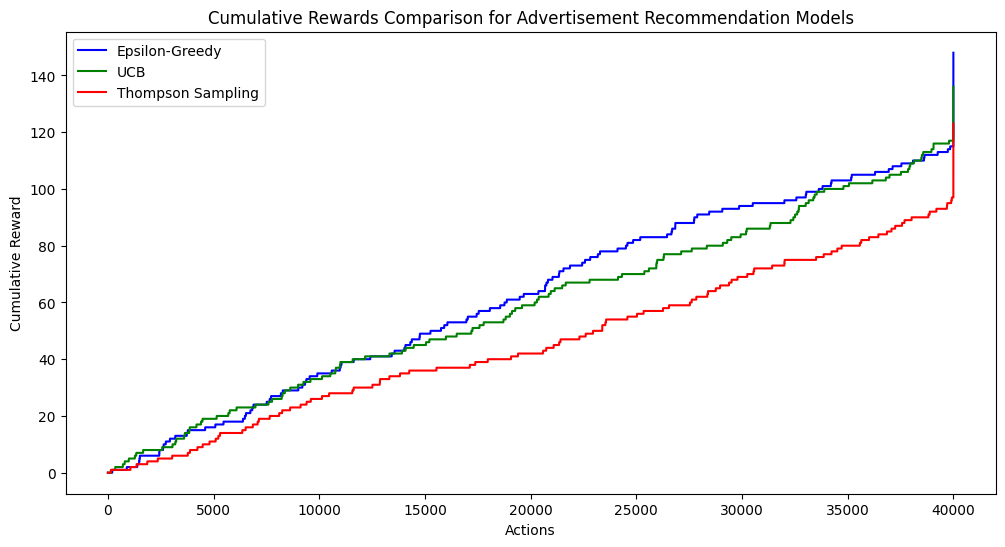

In [ ]:
# Plot Cumulative Rewards Comparison
cumulative_eg_rewards = np.cumsum(epsilon_greedy_rewards)
cumulative_ucb_rewards = np.cumsum(ucb_rewards)
cumulative_ts_rewards = np.cumsum(thompson_sampling_rewards)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_eg_rewards, label='Epsilon-Greedy', color='blue')
plt.plot(cumulative_ucb_rewards, label='UCB', color='green')
plt.plot(cumulative_ts_rewards, label='Thompson Sampling', color='red')
plt.xlabel("Actions")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards Comparison for Advertisement Recommendation Models")
plt.legend()
plt.show()


The graph compares cumulative rewards for Epsilon-Greedy, UCB, and Thompson Sampling in an advertisement recommendation task:

* Epsilon-Greedy (blue): Achieves the highest cumulative reward, showing strong exploration-exploitation balance.
* UCB (green): Performs well but slightly behind Epsilon-Greedy, with steady reward accumulation.
* Thompson Sampling (red): Lags significantly, indicating conservative exploration or weaker exploitation.

**Key Insight: Epsilon-Greedy is the best-performing model here, while Thompson Sampling may need tuning for improvement.**

In [ ]:
# Plot Action Selection Distribution for each model
def plot_action_distribution(action_counts, title):
    plt.figure(figsize=(10, 4))
    plt.bar(range(n_actions), action_counts, color="purple")
    plt.title(f"{title} - Action Selection Distribution")
    plt.xlabel("Action (Ad ID)")
    plt.ylabel("Counts of Actions Taken")
    plt.show()

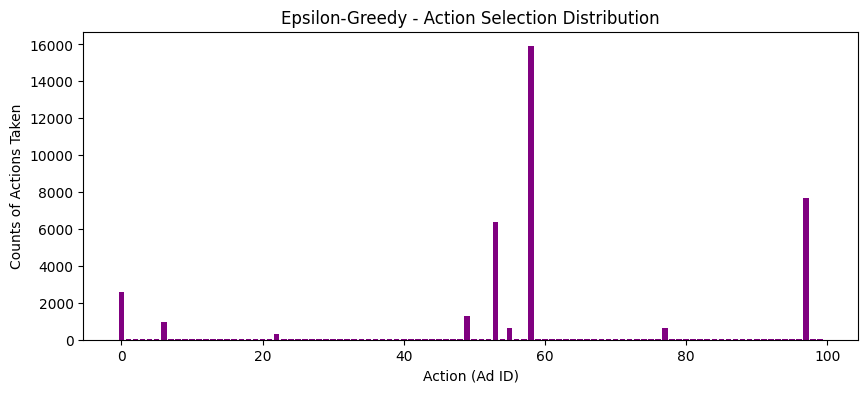

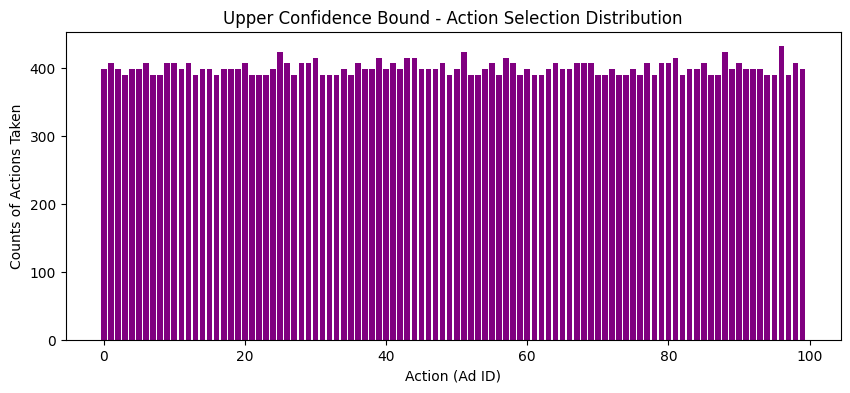

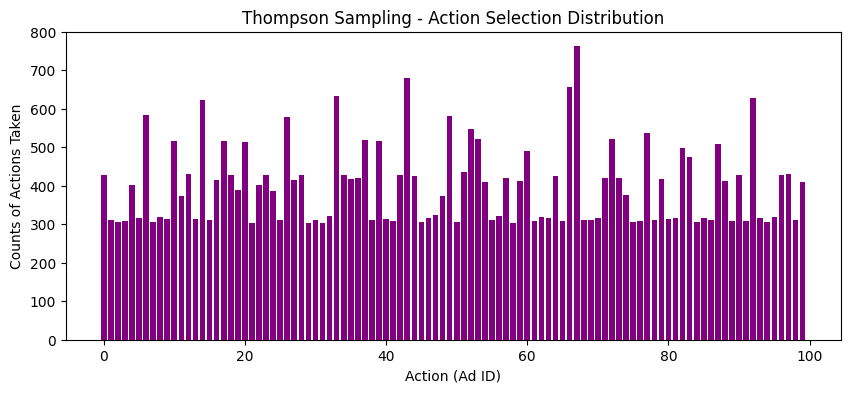

In [ ]:
plot_action_distribution(action_counts, "Epsilon-Greedy")
plot_action_distribution(ucb_action_counts, "Upper Confidence Bound")
plot_action_distribution(ts_successes + ts_failures, "Thompson Sampling")

***Graph 1:***

1. Concentration on Few Ads:

Epsilon-Greedy primarily focuses on a small subset of ads, with a few ads being selected far more frequently than others.
Ads around IDs 0, 60, and 100 are selected thousands of times, while most other ads are barely chosen, indicating exploitation of high-reward ads.

2. Exploration and Exploitation Balance:

The sparse selection of many ads suggests limited exploration. Once high-reward ads are identified, Epsilon-Greedy prioritizes them heavily, with minimal selection of other ads.

3. Potential for Skewed Recommendations:

This selection pattern could lead to over-recommendation of a few ads, which might be suitable for short-term reward maximization but could limit long-term learning of potentially good but less-explored ads.
Overall, the Epsilon-Greedy approach here is highly exploitative, prioritizing ads with known high rewards at the expense of exploring other options.

***Graph 2:***

1. Uniform Distribution:

The distribution of actions taken appears to be relatively uniform across all ad IDs. This indicates that the Upper Confidence Bound (UCB) algorithm is exploring a wide range of actions and not favoring any particular ad ID significantly.

2. No Dominant Ad ID:

There is no single ad ID that stands out with a significantly higher count of actions taken. This suggests that the UCB algorithm is not converging on a specific ad ID as the most effective one.

3. Exploration vs. Exploitation:

The uniform distribution suggests that the UCB algorithm is still in the exploration phase, where it is trying out different actions to gather more information about their rewards. It is not yet heavily exploiting the actions with the highest estimated rewards.

***Graph 3:***


The bar chart shows the action selection distribution for Thompson Sampling, used in multi-armed bandit problems to balance exploration and exploitation. Key observations:

1. Variation in Action Counts:

Counts range widely from around 200 to 700, indicating that some ads were selected far more frequently, likely due to higher estimated success rates.

2. Exploration vs. Exploitation:

Thompson Sampling balances trying out various ads with favoring successful ones. Ads around IDs 10, 30, 50, 70, and some in the 90s have notably higher counts, showing they performed well.

3. Broad Distribution:

Most ads were chosen at least a few times, showing that the algorithm explored broadly while focusing on top-performing ads.

**This illustrates Thompson Sampling’s adaptive nature in optimizing ad selection based on observed performance.**

# II. DEEP REINFORCEMENT LEARNING MODEL

## Deep Q-Networks [DQN]

In [ ]:
data = df

In [ ]:
state_size = data.shape[1] - 1
# The number of features in each state (excluding the target variable).
# It's derived from the dataset dimensions; assuming the last column is the target.

num_actions = 10
# The number of possible actions the agent can take, corresponding to 10 different ads.

learning_rate = 0.001
# The step size used in the model's optimizer. Controls how much the model adjusts weights with each update.

gamma = 0.95
# The discount factor for future rewards. Determines the importance of future rewards;
# a value close to 1 means future rewards are highly valued.

epsilon = 1.0
# The initial exploration rate for the Epsilon-Greedy strategy, where the agent starts with full exploration.

epsilon_min = 0.01
# The minimum exploration rate. Ensures the agent keeps exploring to a small extent,
# even after significant training.

epsilon_decay = 0.995
# The rate at which epsilon decays after each episode. A smaller epsilon means less exploration over time.

batch_size = 32
# The number of experiences (state-action-reward transitions) sampled from memory and used in each training step.

memory_size = 2000
# The capacity of the replay memory. Stores past experiences for training the agent,
# allowing it to learn from a random sampling of past actions.

episodes = 1000
# The number of episodes the agent will run during training. Each episode represents one complete run (sequence of actions)
# through the environment, helping the agent learn progressively over time.


In [ ]:
# Replay buffer
memory = deque(maxlen=memory_size)

## Model 1: Deep Q - Networks Model

In [ ]:
# DQN Model
def build_dqn_model():
    model = Sequential([
        Dense(24, input_dim=state_size, activation='relu'),
        Dense(24, activation='relu'),
        Dense(num_actions, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

dqn_model = build_dqn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This model structure is common for DQNs in reinforcement learning, enabling the agent to approximate Q-values for action selection.

In [ ]:
# DQN Action Selection
def select_action_dqn(state, model, epsilon):
    if np.random.rand() <= epsilon:
        return random.randrange(num_actions)
    q_values = model.predict(state)
    return np.argmax(q_values[0])

# DQN Training via Replay
def replay_dqn():
    minibatch = random.sample(memory, batch_size)
    for state, action, reward, next_state, done in minibatch:
        target = reward
        if not done:
            target = reward + gamma * np.max(dqn_model.predict(next_state)[0])
        target_f = dqn_model.predict(state)
        target_f[0][action] = target
        dqn_model.fit(state, target_f, epochs=1, verbose=0)

***select_action_dqn***

This function chooses an action for the agent:
With probability epsilon, it explores by picking a random action.
Otherwise, it exploits by selecting the action with the highest predicted Q-value from the model.

***replay_dqn***

This function trains the DQN model using experience replay:
A minibatch of experiences is randomly sampled from memory.
For each experience, it calculates a target Q-value:
If the episode continues, the target includes the discounted future reward.
If the episode ends, the target is just the immediate reward.
The model is then trained to update its Q-values toward these targets, improving its accuracy over time.

In [ ]:
# DQN Replay and Training
def replay_dqn():
    minibatch = random.sample(memory, batch_size)
    total_loss = 0
    for state, action, reward, next_state, done in minibatch:
        target = reward
        if not done:
            target = reward + gamma * np.max(dqn_model.predict(next_state, verbose=0)[0])
        target_f = dqn_model.predict(state, verbose=0)
        target_f[0][action] = target
        history = dqn_model.fit(state, target_f, epochs=1, verbose=0)
        total_loss += history.history['loss'][0]
    return total_loss / batch_size

In [ ]:
# Training DQN with loss recording
dqn_losses = []
for episode in range(episodes):
    state = data.sample(1).drop(columns=['Reward']).values
    state = np.reshape(state, [1, state_size])
    done = False
    total_reward = 0
    avg_loss = 0  # Default value for episodes without enough experiences

    while not done:
        action = select_action_dqn(state, dqn_model, epsilon)
        next_state = data.sample(1).drop(columns=['Reward']).values
        reward = data.sample(1)['Reward'].values[0]
        next_state = np.reshape(next_state, [1, state_size])
        done = (reward == 0)

        memory.append((state, action, reward, next_state, done))
        total_reward += reward
        state = next_state

        if len(memory) > batch_size:
            avg_loss = replay_dqn()

    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    # Append the actual or default avg_loss for this episode
    dqn_losses.append(avg_loss)

# Plot DQN losses
plt.plot(dqn_losses, label='DQN Loss')
plt.xlabel('Episodes')
plt.ylabel('Average Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

## Model 2: Double Deep Q-Networks [DDQN]

In [ ]:
# Training Double DQN with loss recording
ddqn_losses = []
update_target_model()  # Initial target model update

for episode in range(episodes):
    state = data.sample(1).drop(columns=['Reward']).values
    state = np.reshape(state, [1, state_size])
    done = False
    total_reward = 0
    avg_loss = 0  # Default value for episodes without enough experiences

    while not done:
        action = select_action_dqn(state, ddqn_model, epsilon)
        next_state = data.sample(1).drop(columns=['Reward']).values
        reward = data.sample(1)['Reward'].values[0]
        next_state = np.reshape(next_state, [1, state_size])
        done = (reward == 0)

        memory.append((state, action, reward, next_state, done))
        total_reward += reward
        state = next_state

        if len(memory) > batch_size:
            avg_loss = replay_ddqn()

    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    # Update target model periodically
    if episode % 10 == 0:
        update_target_model()

    # Append the actual or default avg_loss for this episode
    ddqn_losses.append(avg_loss)

# Plot DDQN losses
plt.plot(ddqn_losses, label='DDQN Loss')
plt.xlabel('Episodes')
plt.ylabel('Average Loss')
plt.legend()
plt.show()

* **Initialization**: Prepare to track losses and update the target model.
* **Episode Loop**: For each episode, initialize the starting state and flags.
* **Action Selection**: Choose an action based on the current policy.
* **Experience Storage**: Save the experience for later replay training.
* **Training Decision**: Train the model based on the experiences gathered.
* **Epsilon Decay**: Gradually shift from exploration to exploitation.
* **Target Model Update**: Periodically update the target network for stability.
* **Loss Recording**: Store loss values for plotting after training.
* **Visualization**: Create a plot to display the training progress over episodes.

### Comparison Plot

In [ ]:
# Plot comparison of DQN and DDQN losses
plt.plot(dqn_losses, label='DQN Loss')
plt.plot(ddqn_losses, label='DDQN Loss')
plt.xlabel('Episodes')
plt.ylabel('Average Loss')
plt.title('DQN vs DDQN Loss')
plt.legend()
plt.show()